<a href="https://colab.research.google.com/github/kdovin/project_Lovely-G.4_none/blob/main/%EB%8F%84%EB%B9%88_2%EC%A3%BC%EC%B0%A8_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 기본 한글 폰트로 설정
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random, warnings
warnings.filterwarnings("ignore")

Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
#데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이터/주택가격/train.csv') #모델 학습 파일
test = pd.read_csv('/content/drive/MyDrive/데이터/주택가격/test.csv') #모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/데이터/주택가격/sample_submission.csv') #답안지 파일

# 1차 변수 정리 (상관계수)

In [3]:
# 0.3미만 상관계수 변수 드롭
train.drop(columns=['MSSubClass','LotArea','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], inplace=True)
test.drop(columns=['MSSubClass','LotArea','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], inplace=True)

# 그 외 드롭(목표변수와 관련없는 변수이면서 결측값이 많은(1000개 이상) 변수)
train.drop(columns=['MiscFeature','PoolQC','Alley','Fence'], inplace=True)
test.drop(columns=['MiscFeature','PoolQC','Alley','Fence'], inplace=True)

# 2차 변수 정리 (결측값, 상관계수)

In [4]:
#숫자형 - 중앙값으로 채우기
train['LotFrontage'].fillna(69, inplace=True)
test['LotFrontage'].fillna(67, inplace=True)

train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

train['GarageYrBlt'].fillna(1980, inplace=True)
test['GarageYrBlt'].fillna(1979, inplace=True)

test['BsmtFinSF1'].fillna(350.5, inplace=True)

test['TotalBsmtSF'].fillna(988, inplace=True)

test['GarageCars'].fillna(2, inplace=True)

test['GarageArea'].fillna(480, inplace=True)

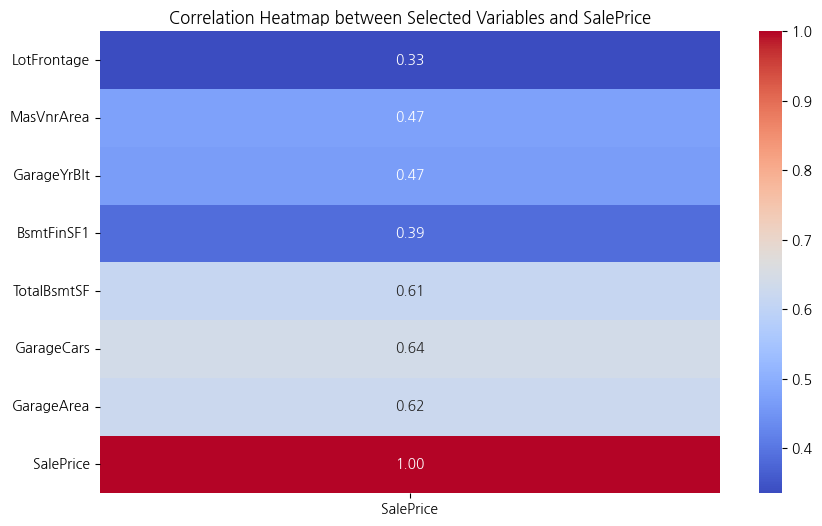

In [5]:
# 선택할 열들
selected_columns = ['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1','TotalBsmtSF','GarageCars','GarageArea']

# 선택한 열들과 SalePrice만 포함한 데이터프레임 생성
selected_df = train[selected_columns + ['SalePrice']]

# 목표변수인 SalePrice와의 상관관계 계산
correlation_matrix = selected_df.corr()

# SalePrice와의 상관관계 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Selected Variables and SalePrice')
plt.show()

ㄴ 0.3 미만이 없어서 모두 유지

In [6]:
# 문자형 - 최빈값으로 채우기
train['FireplaceQu'].fillna('NA', inplace=True)
test['FireplaceQu'].fillna('NA', inplace=True)

train['BsmtQual'].fillna('TA', inplace=True)
test['BsmtQual'].fillna('TA', inplace=True)

train['BsmtCond'].fillna('TA', inplace=True)
test['BsmtCond'].fillna('TA', inplace=True)

train['BsmtExposure'].fillna('No', inplace=True)
test['BsmtExposure'].fillna('No', inplace=True)

train['BsmtFinType1'].fillna('Unf', inplace=True)
test['BsmtFinType1'].fillna('Unf', inplace=True)

train['BsmtFinType2'].fillna('Unf', inplace=True)
test['BsmtFinType2'].fillna('Unf', inplace=True)

train['GarageType'].fillna('Attchd', inplace=True)
test['GarageType'].fillna('Attchd', inplace=True)

train['GarageFinish'].fillna('Unf', inplace=True)
test['GarageFinish'].fillna('Unf', inplace=True)

train['GarageQual'].fillna('TA', inplace=True)
test['GarageQual'].fillna('TA', inplace=True)

train['GarageCond'].fillna('TA', inplace=True)
test['GarageCond'].fillna('TA', inplace=True)

train['MasVnrType'].fillna('None', inplace=True)

train['Electrical'].fillna('SBrkr', inplace=True)
test['Electrical'].fillna('SBrkr', inplace=True)

test['MSZoning'].fillna('RL', inplace=True)

test['Utilities'].fillna('AllPub', inplace=True)

test['Exterior1st'].fillna('VinylSd', inplace=True)

test['Exterior2nd'].fillna('VinylSd', inplace=True)

test['MasVnrType'].fillna('None', inplace=True)

test['KitchenQual'].fillna('TA', inplace=True)

test['Functional'].fillna('Typ', inplace=True)

test['SaleType'].fillna('WD', inplace=True)

In [7]:
#문자형 변수 최빈값으로 채우고 상관계수 0.3 미만 드롭
train.drop(columns=['FireplaceQu','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','BsmtQual','Electrical','Exterior1st','Exterior2nd','Functional','GarageCond','GarageQual','GarageType','MSZoning','MasVnrType','SaleType','Utilities'
], inplace=True)
test.drop(columns=['FireplaceQu','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','BsmtQual','Electrical','Exterior1st','Exterior2nd','Functional','GarageCond','GarageQual','GarageType','MSZoning','MasVnrType','SaleType','Utilities'
], inplace=True)

In [8]:
mode_value = train['GarageFinish'].mode()[0]
print("변수 'GarageFinish '의 최빈값:", mode_value)

변수 'GarageFinish '의 최빈값: Unf


# 이상치 처리

**<train 이상치>**

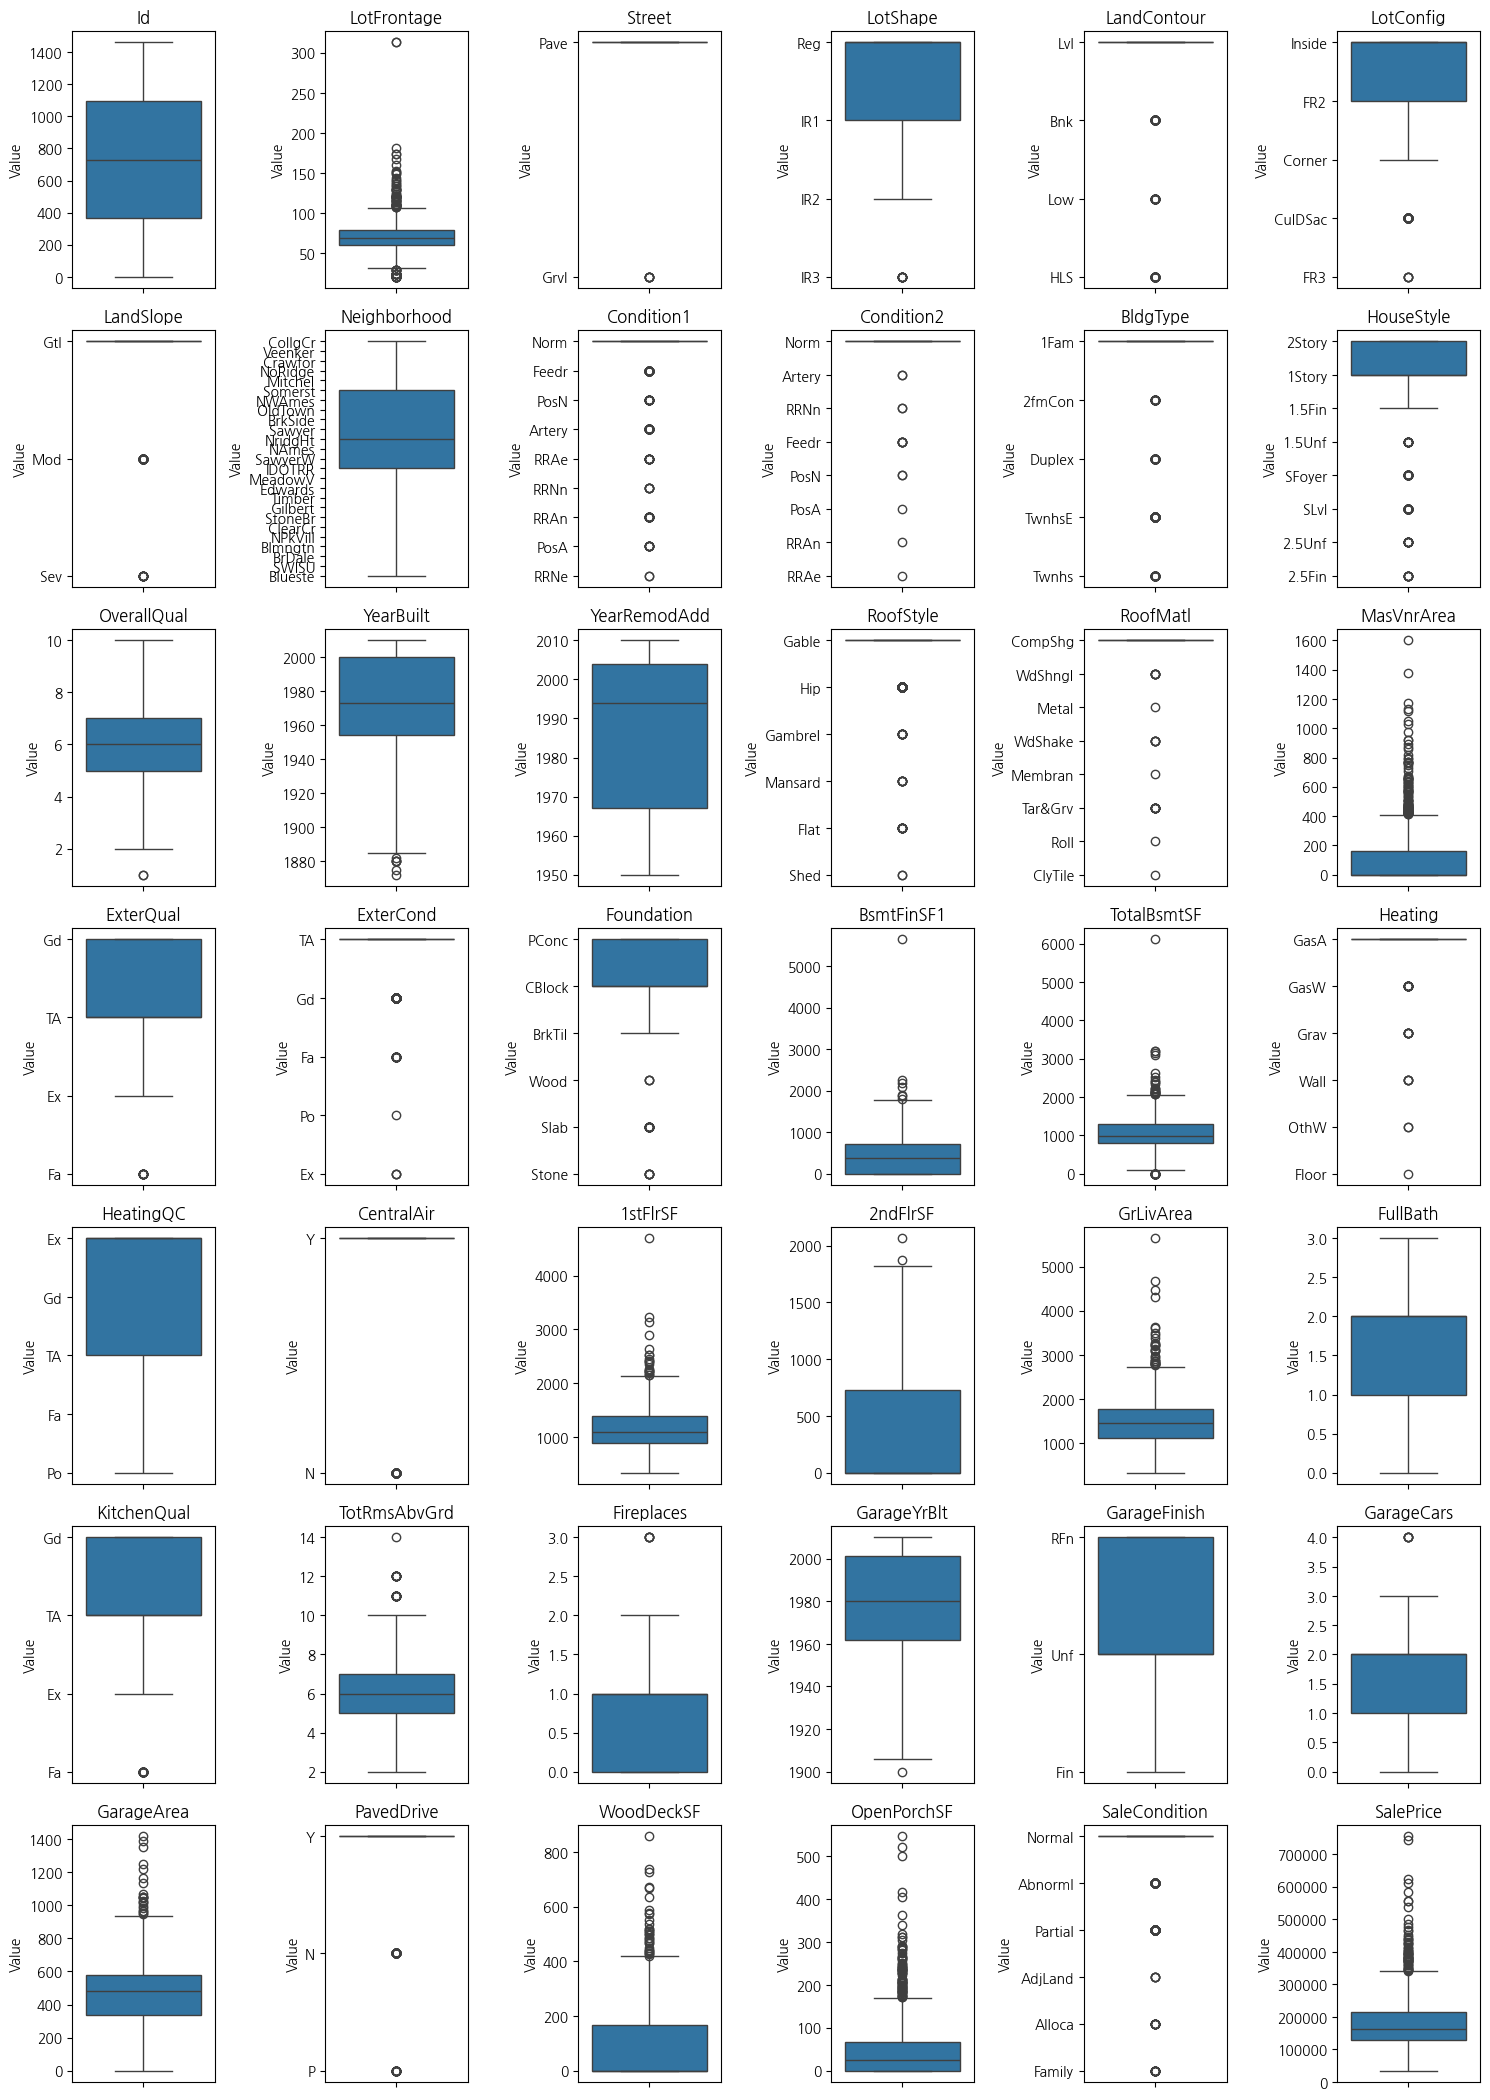

In [9]:
# 박스플롯 그리기
plt.figure(figsize=(15, 30))  # 전체 그림의 크기 설정

for i, column in enumerate(train.columns, 1):  # enumerate를 통해 인덱스와 값을 함께 가져옴
    plt.subplot(10, 6, i)  # 1행 3열의 subplot에서 i번째 위치에 그래프를 그림
    sns.boxplot(data=train[column])
    plt.title(f'{column}')
    plt.ylabel('Value')

plt.tight_layout()  # 그래프 간격을 조정하여 겹치지 않게 함
plt.show()

< 이상치 발견 리스트>
- LotFrontage : 부동산과 연결된 거리의 선형 피트 **-> 1289행**
- OverallQual : 전체적인 재질 및 마감 품질 **-> 375행, 533행**
- YearBuilt : 원래 건설 날짜 **-> 이상치 X**
- MasVnrArea :  석조 베니어 면적(평방 피트) **-> 이상치 X**
- BsmtFinSF1 : 유형 1 마감 평방피트 **-> 1289행**
- TotalBsmtSF : 지하 면적의 총 평방피트 **-> 1289행**
- 1stFlrSF : 1층 평방 피트 **-> 1289행**
- 2ndFlrSF : 2층 평방 피트 **-> 691행, 1182행**
- GrLivArea : 지상(지상) 생활 면적 평방 피트 **-> 1289행**
- TotRmsAbvGrd : 1층 위의 총 객실 수(욕실은 포함되지 않음) **-> 1289행**
- Fireplaces : 벽난로 수 **-> 이상치 x**
- GarageYrBlt : 차고가 건설된 연도 **-> 이상치 x**
- GarageCars : 차량 수용 차고의 개수 **-> 이상치 x**
- SalePrice - 부동산 판매 가격(달러) **-> 691행, 1182행**

1. 1289행 드롭 (이상치 6개 변수에서 발견)
2.  691, 1182행 = 2층이 있고, 가격도 그래서 비싼 거임 때문에 이상치 X
3. 나머지 행 중앙값으로 대체

In [10]:
#이상치 대체
train.loc[934,'LotFrontage'] = 67

train.loc[375,'OverallQual'] = 6
train.loc[533,'OverallQual'] = 6

In [11]:
#이상치 많은 행 드롭
train.drop(1298, inplace=True)

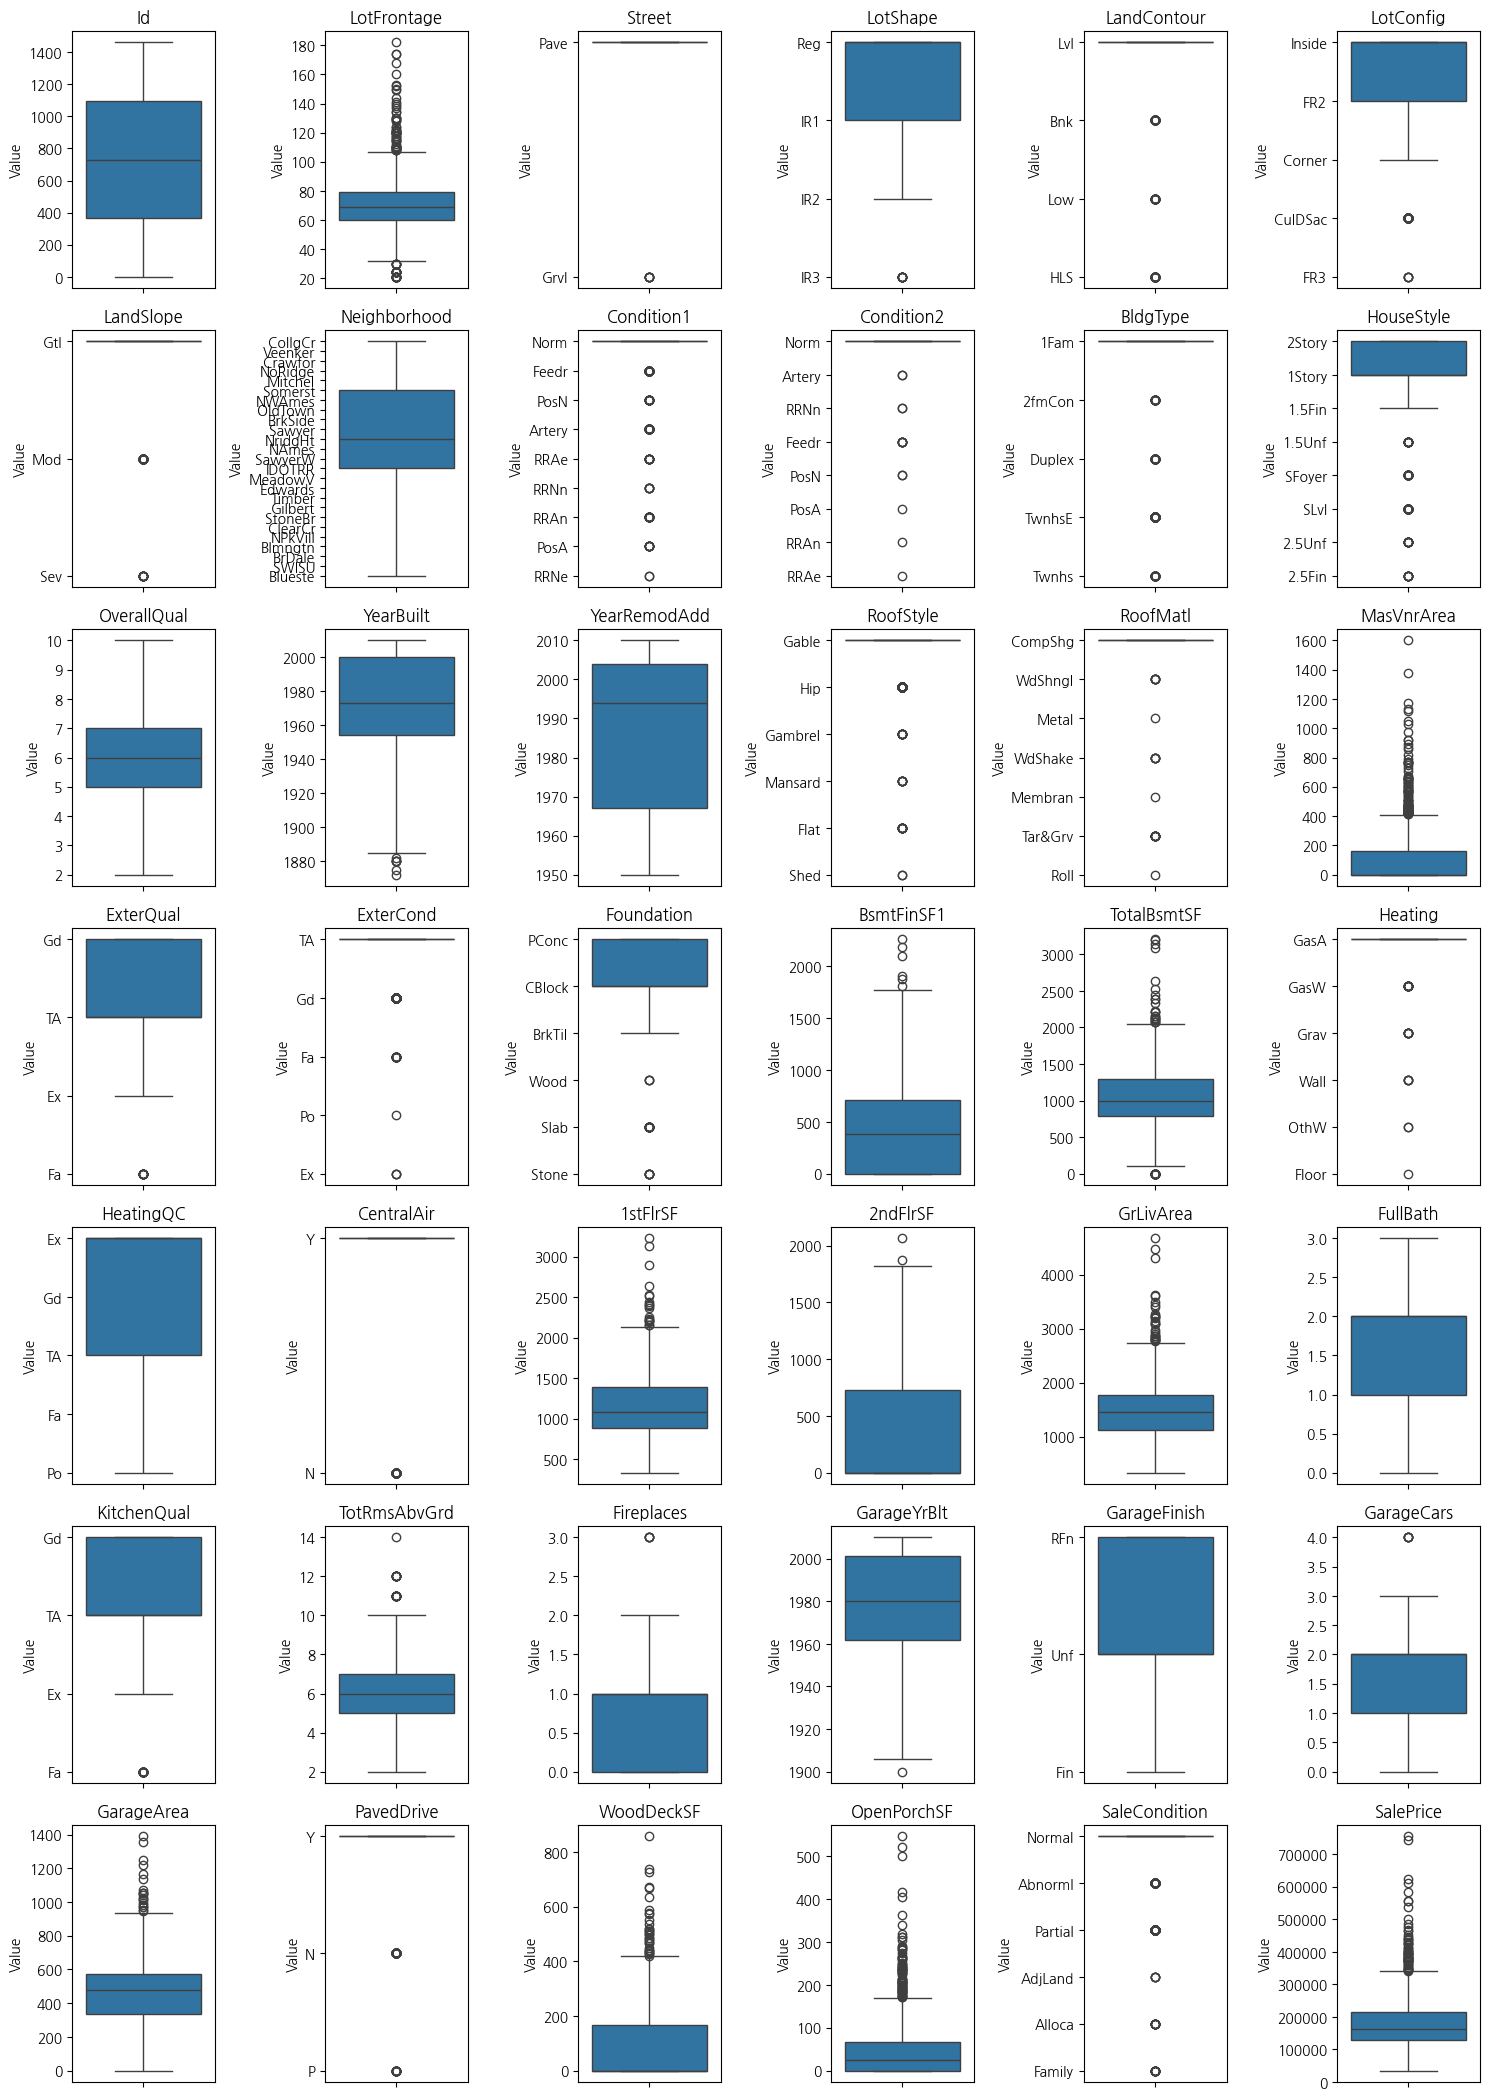

In [12]:
#이상치 처리 재확인
plt.figure(figsize=(15, 30))
for i, column in enumerate(train.columns, 1):
    plt.subplot(10, 6, i)
    sns.boxplot(data=train[column])
    plt.title(f'{column}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

**<test 이상치>**

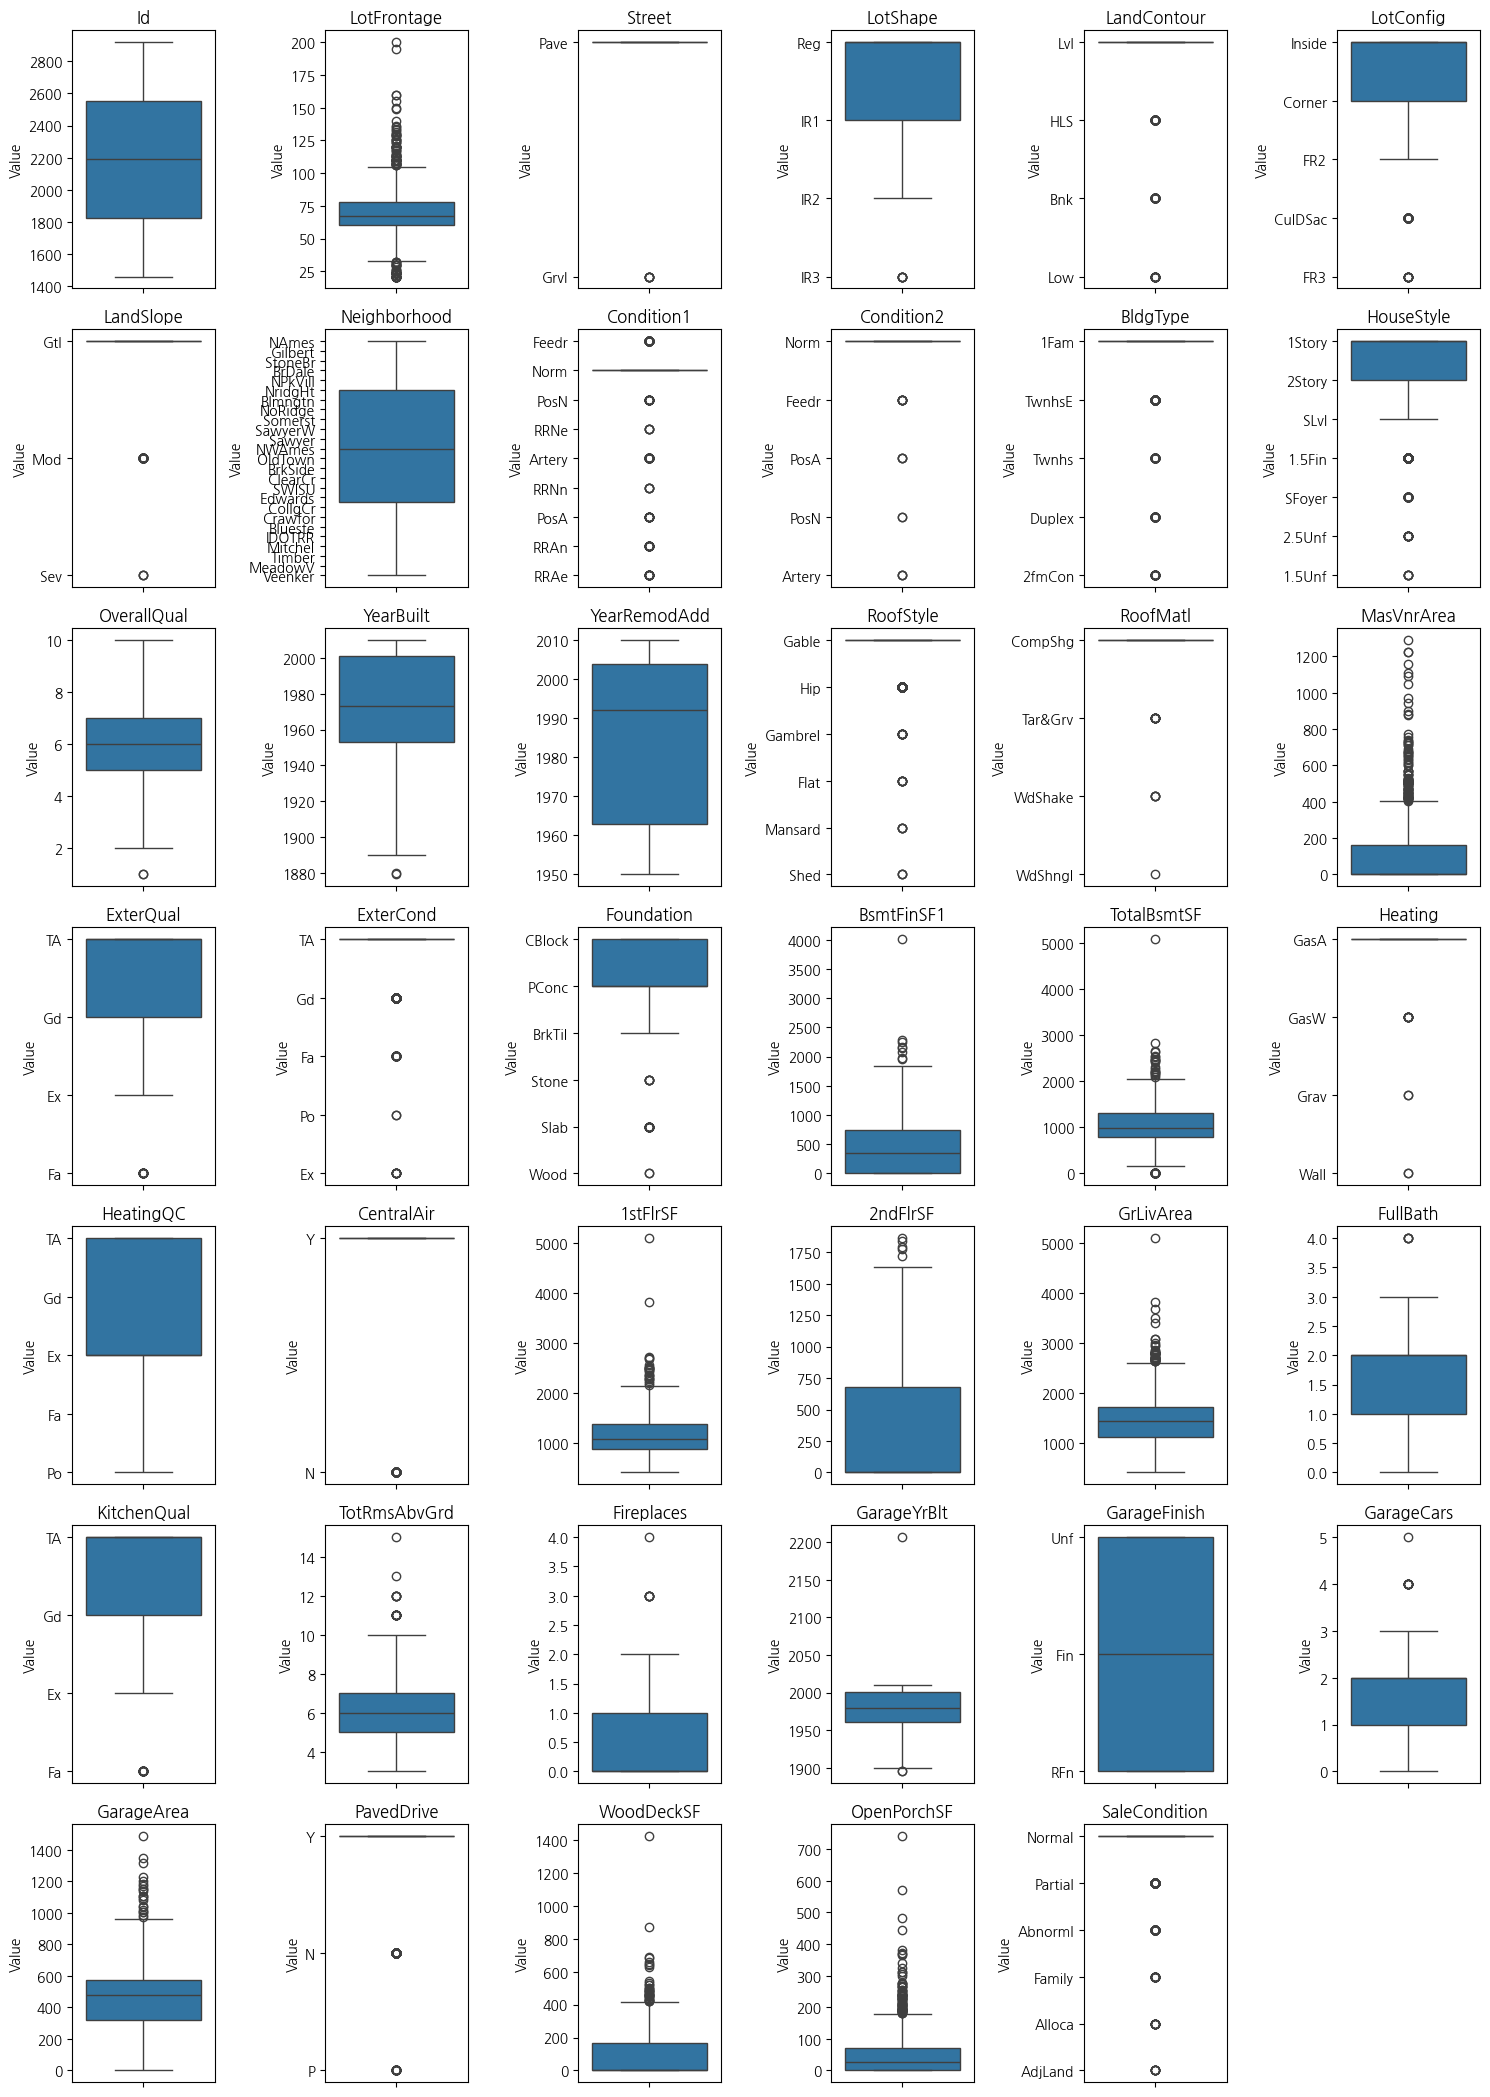

In [13]:
# 박스플롯 그리기
plt.figure(figsize=(15, 30))  # 전체 그림의 크기 설정

for i, column in enumerate(test.columns, 1):  # enumerate를 통해 인덱스와 값을 함께 가져옴
    plt.subplot(10, 6, i)  # 1행 3열의 subplot에서 i번째 위치에 그래프를 그림
    sns.boxplot(data=test[column])
    plt.title(f'{column}')
    plt.ylabel('Value')

plt.tight_layout()  # 그래프 간격을 조정하여 겹치지 않게 함
plt.show()

< 이상치 발견 리스트>
- LotFrontage : 부동산과 연결된 거리의 선형 피트 **-> 804행, 1139행**
- OverallQual : 전체적인 재질 및 마감 품질 **-> 756행, 1444행**
- YearBuilt : 원래 건설 날짜 **-> 이상치 X**
- MasVnrArea :  석조 베니어 면적(평방 피트) **-> 이상치 X**
- BsmtFinSF1 : 유형 1 마감 평방피트 **-> 1089행**
- TotalBsmtSF : 지하 면적의 총 평방피트 **-> 1089행**
- 1stFlrSF : 1층 평방 피트 **-> 728행, 1089행**
- 2ndFlrSF : 2층 평방 피트 **-> train과 같은 이유
- GrLivArea : 지상(지상) 생활 면적 평방 피트 **-> 1089행**
- FullBath : 1층 이상 욕실 개수 **-> 이상치 x**
- TotRmsAbvGrd : 1층 위의 총 객실 수(욕실은 포함되지 않음) **-> 1089행**
- Fireplaces : 벽난로 수 **-> 이상치 x**
- GarageYrBlt : 차고가 건설된 연도 **-> 2207행 진짜 이상치**
- GarageCars : 차량 수용 차고의 개수 **-> 이상치 x**
- WoodDeckSF : 목재 데크 면적(평방 피트) **-> 1146행**
- OpenPorchSF : 개방형 현관 면적(제곱피트) **-> 1097행**

1. 1089행 드롭 (이상치 5개 변수에서 발견)
2. 나머지 행 중앙값으로 대체

In [14]:
# 이상치 대체
test.loc[804,'LotFrontage'] = 67
test.loc[1139,'LotFrontage'] = 67

test.loc[756,'OverallQual'] = 6
test.loc[1444,'OverallQual'] = 6

test.loc[728,'1stFlrSF'] = 1079

#차고 건설 연도가 2207년!! 말두안댐ㅋㅋ
test.loc[1132,'GarageYrBlt'] = 1979

test.loc[1146,'WoodDeckSF'] = 0

test.loc[1146,'OpenPorchSF'] = 28

In [15]:
# 이상치 많은 행 드롭
test.drop(1089, inplace=True) #ta

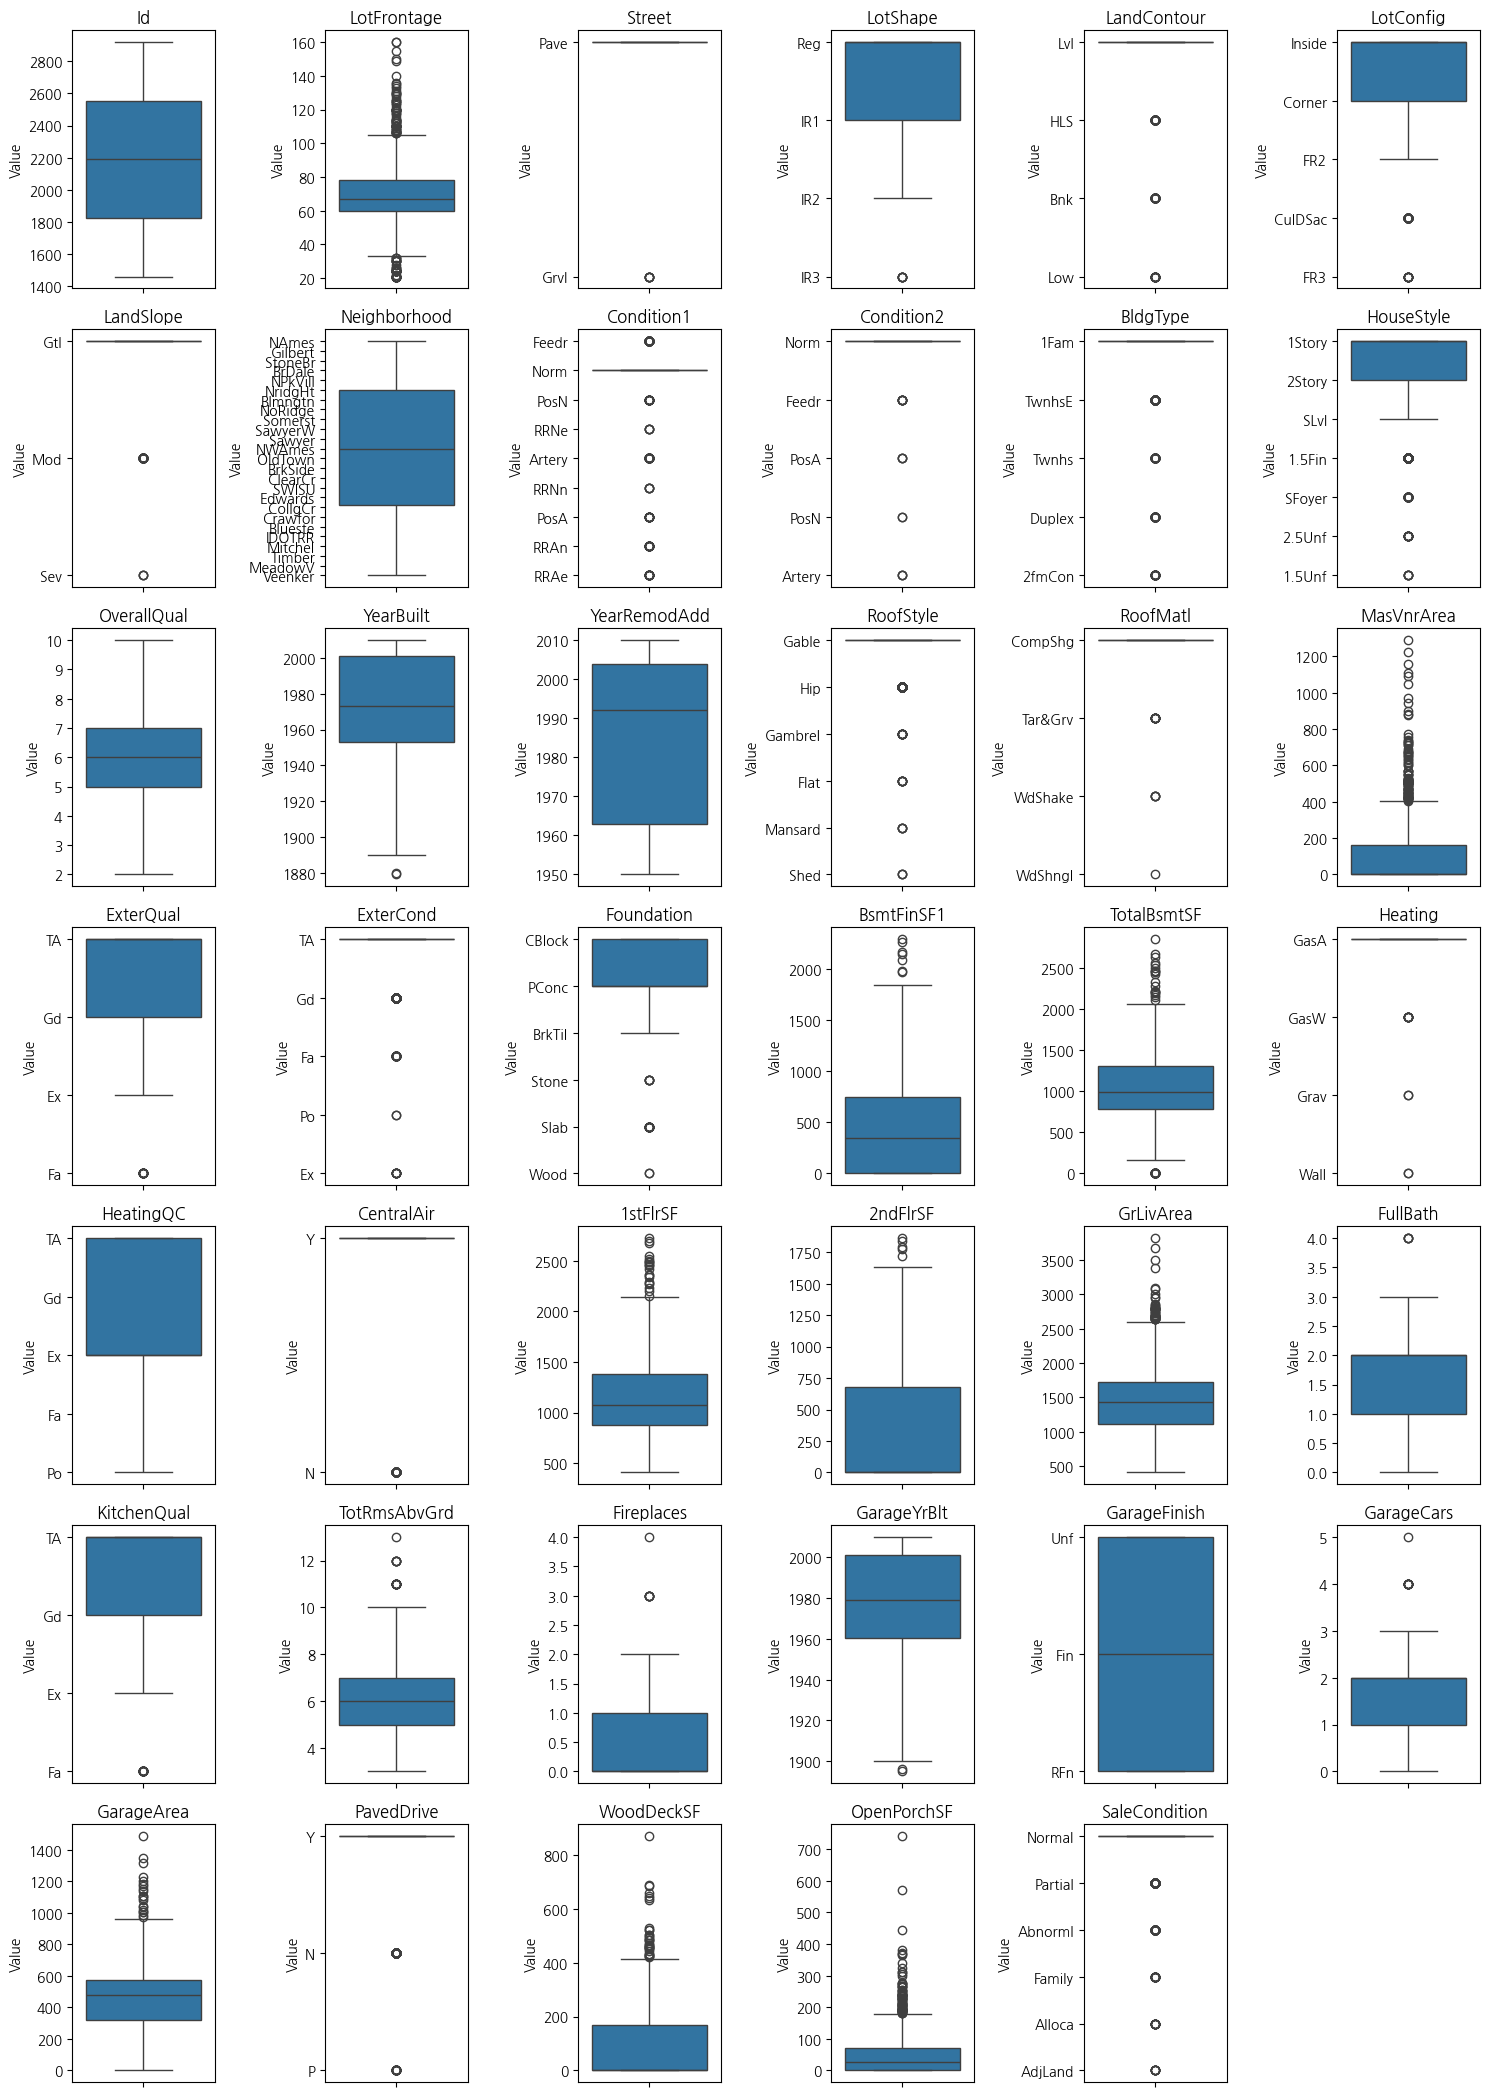

In [16]:
# 이상치 처리 재확인
plt.figure(figsize=(15, 30))  # 전체 그림의 크기 설정

for i, column in enumerate(test.columns, 1):  # enumerate를 통해 인덱스와 값을 함께 가져옴
    plt.subplot(10, 6, i)  # 1행 3열의 subplot에서 i번째 위치에 그래프를 그림
    sns.boxplot(data=test[column])
    plt.title(f'{column}')
    plt.ylabel('Value')

plt.tight_layout()  # 그래프 간격을 조정하여 겹치지 않게 함
plt.show()

# 스케일링

1. 표준화 (Standardization): 데이터가 가우시안 분포를 따르거나 이상치가 존재할 때 유용합니다. 선형 회귀, 로지스틱 회귀, 서포트 벡터 머신 (SVM)과 같은 알고리즘에 적합합니다.

2. 정규화 (Normalization): 데이터가 정규 분포를 따르지 않고 모든 값이 양수이거나 일부 알고리즘이 값의 범위를 [0, 1] 또는 [-1, 1]로 요구할 때 유용합니다. 신경망(Neural Networks), K-최근접 이웃 (KNN)과 같은 알고리즘에 적합합니다.

3. 다른 변환 방법: 로그 변환, 제곱근 변환 등의 다른 변환 방법은 데이터의 분포나 특성에 따라 유용할 수 있습니다. 예를 들어, 데이터가 정규 분포를 따르지 않는 경우 로그 변환은 데이터를 정규분포에 가깝게 만들 수 있습니다.

4. 없음 (No Scaling): 일부 알고리즘은 스케일링을 요구하지 않을 수 있습니다. 예를 들어, 결정 트리(Decision Trees)와 같은 트리 기반 모델은 데이터의 스케일에 민감하지 않습니다.

<로그 변환>
- 로그 변환은 주로 양수 값이나 양수 값이어야 하는 데이터에 적용
- 음수 값이나 0이 있는 데이터에는 로그 변환을 적용할 수 없음
- 로그 변환은 주로 연속형 변수에 적용되며, 정수형 변수나 실수형 변수도 가능
- 범주형 변수에는 로그 변환을 적용할 수 없습니다.
- 데이터가 왜곡된 경우에만 로그 변환을 고려
- 일반적으로 데이터가 균등하게 분포되어 있을 땐 비추천

=> 범주형이 아니면서 이상치가 있는 변수들

1. 왜도 (Skewness)
 - 확률 분포의 비대칭 정도를 나타내는 지표.
 - 왜도가 0보다 크면 오른쪽으로 긴 꼬리(왼쪽으로 길면 음수)
 - 왜도가 0에 가까울수록 분포가 대칭에 가깝.

2. 첨도 (Kurtosis)
 - 확률 분포의 뾰족한 정도를 나타내는 지표.
 - 첨도가 3에 가까우면 정규 분포에 가까움
 - 3보다 크면 뾰족한 분포를 가지며, 3보다 작으면 더 평평한 분포.

In [17]:
#train
#왜도와 첨도
from scipy.stats import skew, kurtosis

# 수치형 변수의 열만 골라서 왜도와 첨도 계산
numeric_columns = train.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    skewness = skew(train[column])
    kurt = kurtosis(train[column])
    print("변수 {}: 왜도={}, 첨도={}".format(column, skewness, kurt))

변수 Id: 왜도=0.0010908081591432459, 첨도=-1.1990118844148756
변수 LotFrontage: 왜도=0.790147913009434, 첨도=3.496413990522398
변수 OverallQual: 왜도=0.27086110573056765, 첨도=-0.07077163486761551
변수 YearBuilt: 왜도=-0.6122870511196181, 첨도=-0.44226200490849976
변수 YearRemodAdd: 왜도=-0.5021830401310006, 첨도=-1.272834021835345
변수 MasVnrArea: 왜도=2.683607961069079, 첨도=10.238885039160353
변수 BsmtFinSF1: 왜도=0.7921537403663171, 첨도=0.018233935428930703
변수 TotalBsmtSF: 왜도=0.5730470161489449, 첨도=2.0180240812739454
변수 1stFlrSF: 왜도=0.9514307533067177, 첨도=1.4729845276748836
변수 2ndFlrSF: 왜도=0.8145446347170533, 첨도=-0.5503653766158374
변수 GrLivArea: 왜도=1.118436199683156, 첨도=2.7618524818265326
변수 FullBath: 왜도=0.03782109000335702, 첨도=-0.8580396138100537
변수 TotRmsAbvGrd: 왜도=0.663750117309606, 첨도=0.8481374500037635
변수 Fireplaces: 왜도=0.6302935903158983, 첨도=-0.2944180997125776
변수 GarageYrBlt: 왜도=-0.6771943072741862, 첨도=-0.2615723848023186
변수 GarageCars: 왜도=-0.3414938335539552, 첨도=0.21406169383309148
변수 GarageArea: 왜도=0.132163063558

<train 이상치가 많고 높으면서 왜도와 첨도가 안 좋은 변수들>

LotFrontage, YearBuilt, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF

무한대로 바뀌는 거 빼고 변환

In [18]:
# 로그 변환을 적용할 변수 선택
columns_to_log_transform = ['LotFrontage', 'YearBuilt', '1stFlrSF', 'GrLivArea']
# 선택한 변수들에 로그 변환 적용
for column in columns_to_log_transform:
    train[column] = np.log(train[column])

In [19]:
#test
#왜도와 첨도
from scipy.stats import skew, kurtosis

# 수치형 변수의 열만 골라서 왜도와 첨도 계산
numeric_columns = test.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    skewness = skew(test[column])
    kurt = kurtosis(test[column])
    print("변수 {}: 왜도={}, 첨도={}".format(column, skewness, kurt))

변수 Id: 왜도=0.001330388507749914, 첨도=-1.1997956978648538
변수 LotFrontage: 왜도=0.46908942005007276, 첨도=2.0364071169683395
변수 OverallQual: 왜도=0.22660064335603997, 첨도=-0.09565075541227008
변수 YearBuilt: 왜도=-0.5864523581779175, 첨도=-0.5816715865706406
변수 YearRemodAdd: 왜도=-0.39866542734879357, 첨도=-1.4125474391499524
변수 MasVnrArea: 왜도=2.4855241288297454, 첨도=7.9617492443067945
변수 BsmtFinSF1: 왜도=0.905811096833957, 첨도=0.35659706950786374
변수 TotalBsmtSF: 왜도=0.33458229956063174, 첨도=0.8181483169629802
변수 1stFlrSF: 왜도=0.8381202910383774, 첨도=0.8188890707720007
변수 2ndFlrSF: 왜도=0.9109197246116505, 첨도=-0.2804157863446579
변수 GrLivArea: 왜도=0.9134125063565179, 첨도=1.1341349127859779
변수 FullBath: 왜도=0.2968885697956152, 첨도=-0.23489887338088788
변수 TotRmsAbvGrd: 왜도=0.7503211940036306, 첨도=0.9682562897186635
변수 Fireplaces: 왜도=0.8200616209215649, 첨도=0.390963707166208
변수 GarageYrBlt: 왜도=-0.6947454266991829, 첨도=-0.2038793437579134
변수 GarageCars: 왜도=-0.10739446580649166, 첨도=0.2507471116244493
변수 GarageArea: 왜도=0.287967868

<test 이상치가 많고 높으면서 왜도와 첨도가 안 좋은 변수들>

LotFrontage, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF

무한대로 바뀌는 거 빼고 변환

In [20]:
# 로그 변환을 적용할 변수 선택
columns_to_log_transform = ['LotFrontage', '1stFlrSF', 'GrLivArea']

# 선택한 변수들에 로그 변환 적용
for column in columns_to_log_transform:
    test[column] = np.log(test[column])

# 인코딩 후 데이터프레임 정리(상관계수)

< train >

In [22]:
from sklearn.preprocessing import LabelEncoder

# 각 범주형 변수를 레이블 인코딩하여 기존의 변수에 대체
label_encoder = LabelEncoder()
for column in train.select_dtypes(include=['object']).columns:
    train[column] = label_encoder.fit_transform(train[column])

< test >

In [23]:
# 각 범주형 변수를 레이블 인코딩하여 기존의 변수에 대체
label_encoder = LabelEncoder()
for column in test.select_dtypes(include=['object']).columns:
    test[column] = label_encoder.fit_transform(test[column])

# 최종 데이터 프레임

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   Street         1459 non-null   int64  
 3   LotShape       1459 non-null   int64  
 4   LandContour    1459 non-null   int64  
 5   LotConfig      1459 non-null   int64  
 6   LandSlope      1459 non-null   int64  
 7   Neighborhood   1459 non-null   int64  
 8   Condition1     1459 non-null   int64  
 9   Condition2     1459 non-null   int64  
 10  BldgType       1459 non-null   int64  
 11  HouseStyle     1459 non-null   int64  
 12  OverallQual    1459 non-null   int64  
 13  YearBuilt      1459 non-null   float64
 14  YearRemodAdd   1459 non-null   int64  
 15  RoofStyle      1459 non-null   int64  
 16  RoofMatl       1459 non-null   int64  
 17  MasVnrArea     1459 non-null   float64
 18  ExterQual    

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1458
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   LotFrontage    1458 non-null   float64
 2   Street         1458 non-null   int64  
 3   LotShape       1458 non-null   int64  
 4   LandContour    1458 non-null   int64  
 5   LotConfig      1458 non-null   int64  
 6   LandSlope      1458 non-null   int64  
 7   Neighborhood   1458 non-null   int64  
 8   Condition1     1458 non-null   int64  
 9   Condition2     1458 non-null   int64  
 10  BldgType       1458 non-null   int64  
 11  HouseStyle     1458 non-null   int64  
 12  OverallQual    1458 non-null   int64  
 13  YearBuilt      1458 non-null   int64  
 14  YearRemodAdd   1458 non-null   int64  
 15  RoofStyle      1458 non-null   int64  
 16  RoofMatl       1458 non-null   int64  
 17  MasVnrArea     1458 non-null   float64
 18  ExterQual    

In [26]:
# 무한대 값 확인
def check_infinity(df):
    infinite_values = []
    for column in df.columns:
        if np.any(np.isinf(df[column])):
            infinite_values.append(column)
    return infinite_values

# train 데이터프레임에서 무한대 값을 확인
infinite_values_train = check_infinity(train)
print("무한대 값을 포함한 변수들 (train):", infinite_values_train)

# test 데이터프레임에서 무한대 값을 확인
infinite_values_test = check_infinity(test)
print("무한대 값을 포함한 변수들 (test):", infinite_values_test)

무한대 값을 포함한 변수들 (train): []
무한대 값을 포함한 변수들 (test): []


# 모델링 & RMSE 및 적합도 검사

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 목표 변수와 특성 변수 나누기
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# 훈련 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 그래디언트 부스팅 모델 정의
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 모델 훈련
model.fit(X_train, y_train)

# 훈련 및 검증 데이터에 대한 예측
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

# RMSE 계산
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
val_rmse = mean_squared_error(y_val, val_predictions, squared=False)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Validation RMSE: {val_rmse:.2f}')

# 모델 적합도 검사
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)

print(f'Train R^2 Score: {train_score:.2f}')
print(f'Validation R^2 Score: {val_score:.2f}')

Train RMSE: 15491.80
Validation RMSE: 25326.69
Train R^2 Score: 0.96
Validation R^2 Score: 0.89
